In [1]:
# pip installs
!pip install lightgbm

In [27]:
# Imports
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import gc
from IPython.display import display

# Sci-kit Learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# LightGBM
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [48]:
# Load file
df = pd.read_csv("all_merged_sw.csv",
                 usecols=['post_id', 'date', 'num_comments', 'score', 'total_awards',
                          'author_commentkarma', 'compound_score', 'author_id', 'author_name',
                          'ticker', 'post_type', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
                          'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X', 
                          'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
                          'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
                          'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
                          'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                          'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
                          'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
                          'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                          'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
                          'adjclose_21_Y'])

df

,post_id,date,num_comments,score,total_awards,author_commentkarma,compound_score,author_id,author_name,ticker,...,sw_18_total_awards,sw_18_compound_score,sw_19_num_comments,sw_19_score,sw_19_total_awards,sw_19_compound_score,sw_20_num_comments,sw_20_score,sw_20_total_awards,sw_20_compound_score
0,ed1i6xt,2019-01-01,2,9,0.0,1855.0,0.2023,a36tf,gundeck925,CONE,...,0.000000,0.202300,2.000000,9.000000,0.000000,0.202300,2.000000,9.000000,0.000000,0.202300
1,ed0rsq9,2019-01-01,1,3,0.0,8101.0,0.4588,54sdn,turbotoast,CACC,...,0.000000,0.458800,1.000000,3.000000,0.000000,0.458800,1.000000,3.000000,0.000000,0.458800
2,ed149cc,2019-01-01,2,6,0.0,234162.0,-0.5106,6lvmmbl,Shmokesshweed,WSBC,...,0.000000,-0.082100,9.400000,9.800000,0.000000,-0.082100,9.400000,9.800000,0.000000,-0.082100
3,ed0rg2j,2019-01-01,9,6,0.0,744.0,0.3612,2dk1wq99,nightman_123,WSBC,...,0.000000,-0.082100,9.400000,9.800000,0.000000,-0.082100,9.400000,9.800000,0.000000,-0.082100
4,abjmvm,2019-01-01,34,10,0.0,744.0,-0.8442,2dk1wq99,nightman_123,WSBC,...,0.000000,-0.082100,9.400000,9.800000,0.000000,-0.082100,9.400000,9.800000,0.000000,-0.082100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940780,ghmym1x,2020-12-31,1,8,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,ADES,...,0.622951,0.060048,4.721311,16.737705,0.622951,0.060048,4.721311,16.737705,0.622951,0.060048
940781,ghmym1x,2020-12-31,1,8,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,JAN,...,0.459854,0.289925,3.759494,17.582278,0.398734,0.247801,3.759494,17.582278,0.398734,0.247801
940782,ghmynsf,2020-12-31,1,10,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,FEYE,...,0.147368,0.136710,3.747368,23.428070,0.147368,0.136710,3.734266,23.353147,0.146853,0.134545
940783,ghmiiu6,2020-12-31,0,4,0.0,22288.0,-0.3875,bgruy,DeadSol,WSBC,...,0.110401,0.052974,56.763949,35.929371,0.112083,0.051706,55.830662,35.546341,0.111025,0.054120


In [4]:
# Print the colum names
df.columns.values

array(['post_id', 'date', 'num_comments', 'score', 'total_awards',
       'author_commentkarma', 'compound_score', 'author_id',
       'author_name', 'ticker', 'post_type', 'adjclose_20_X',
       'adjclose_19_X', 'adjclose_18_X', 'adjclose_17_X', 'adjclose_16_X',
       'adjclose_15_X', 'adjclose_14_X', 'adjclose_13_X', 'adjclose_12_X',
       'adjclose_11_X', 'adjclose_10_X', 'adjclose_9_X', 'adjclose_8_X',
       'adjclose_7_X', 'adjclose_6_X', 'adjclose_5_X', 'adjclose_4_X',
       'adjclose_3_X', 'adjclose_2_X', 'adjclose_1_X', 'adjclose_2_Y',
       'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y', 'adjclose_6_Y',
       'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
       'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y', 'adjclose_14_Y',
       'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y', 'adjclose_18_Y',
       'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y', 'slope',
       'rd_compound_score', 'rd_slope', 'trustworthy', 'author_trust',
       'sw_1_n

In [15]:
# Find the min and max at 1-4 business week intervals
df['5day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmin(axis=1)

df['10day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmin(axis=1)

df['15day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmin(axis=1)

df['20day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmin(axis=1)

df['5day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmax(axis=1)

df['10day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmax(axis=1)

df['15day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmax(axis=1)

df['20day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmax(axis=1)

# Extract the day number and convert to int
df['5day_min'] = df['5day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_min'] = df['10day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_min'] = df['15day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_min'] = df['20day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['5day_max'] = df['5day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_max'] = df['10day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_max'] = df['15day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_max'] = df['20day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)

In [17]:
# Get the X-variable columns
df_X = df[['num_comments', 'score', 'total_awards', 'author_commentkarma',
           'compound_score', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
           'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
           'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
           'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
           'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
           'adjclose_1_X']].to_numpy()

# Get the Y-variable columns
df_Y = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
           'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
           'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
           'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
           'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
           '5day_min', '10day_min', '15day_min', '20day_min', '5day_max',
           '10day_max', '15day_max', '20day_max']].to_numpy()

# Clear up memory
del df
gc.collect()

# Get 80% of the data by date
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,
                                                    shuffle=False)

# Print
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[  2.           9.           0.         ...  52.13834381  51.69112778
   50.32151794]
 [  1.           3.           0.         ... 418.19000244 423.57000732
  424.11999512]
 [  2.           6.           0.         ...  37.21271133  37.09537888
   36.59896469]
 ...
 [  1.          22.           0.         ... 128.88563538 127.82733154
  128.85595703]
 [ 51.         115.           3.         ...  21.10000038  21.59000015
   24.35000038]
 [ 51.         115.           3.         ...   7.1500001    7.07999992
    6.69999981]]
[[ 0.          8.          0.         ...  4.40999985  4.36000013
   4.3499999 ]
 [ 1.         10.          0.         ... 21.76743317 22.11540222
  21.88342476]
 [ 0.          3.          0.         ...  2.04999995  2.05999994
   2.1099999 ]
 ...
 [ 1.         10.          0.         ... 14.81000042 14.27000046
  13.63000011]
 [ 0.          4.          0.         ... 22.61213112 24.74979019
  24.33794785]
 [ 1.          3.          0.         ...  6.          6.61999

In [18]:
# Initialize Model
model = LGBMRegressor(n_estimators=1000)

# Wrap Model for Multiple Outputs
wrapper = MultiOutputRegressor(model).fit(X_train, y_train)

# Wrapper Prediction
ypred = wrapper.predict(X_test)

In [22]:
# Evaluate RMSE
rmse = mean_squared_error(y_test, ypred, multioutput='raw_values', squared=False)

# For each value in rmse
for i in range(1, len(rmse)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The RMSE for adjClose_{}_Y = ".format(i+1), rmse[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The RMSE for {}day_min = ".format((i-20)*5), rmse[i-1])

    # Print the RMSE for max day
    else:
        print("The RMSE for {}day_max = ".format((i-24)*5), rmse[i-1])

The RMSE for adjClose_2_Y =  48.19443496459549
The RMSE for adjClose_3_Y =  47.37717466434149
The RMSE for adjClose_4_Y =  46.99230912185087
The RMSE for adjClose_5_Y =  48.53343349845846
The RMSE for adjClose_6_Y =  49.44599812860674
The RMSE for adjClose_7_Y =  51.95114069523109
The RMSE for adjClose_8_Y =  54.876667845973024
The RMSE for adjClose_9_Y =  55.06556117461778
The RMSE for adjClose_10_Y =  57.187454229241155
The RMSE for adjClose_11_Y =  58.98478830242573
The RMSE for adjClose_12_Y =  62.42732859128593
The RMSE for adjClose_13_Y =  62.96259528149545
The RMSE for adjClose_14_Y =  62.474083362244784
The RMSE for adjClose_15_Y =  63.846557596620855
The RMSE for adjClose_16_Y =  64.69718293765575
The RMSE for adjClose_17_Y =  67.58775200214595
The RMSE for adjClose_18_Y =  68.33396047876532
The RMSE for adjClose_19_Y =  69.03226283365316
The RMSE for adjClose_20_Y =  71.40955827479739
The RMSE for adjClose_21_Y =  71.06806322016563
The RMSE for 5day_min =  1.640355649905154
T

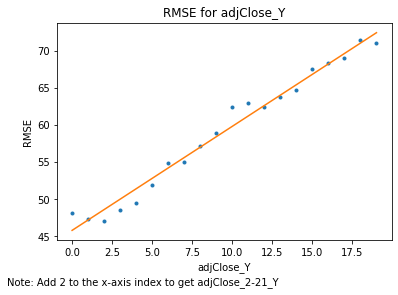

In [26]:
# Plot the RMSE for adjClose
x = np.arange(20)
y = rmse[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('RMSE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [28]:
# Evaluate MAE
mae = mean_absolute_error(y_test, ypred, multioutput='raw_values')

# For each value in rmse
for i in range(1, len(mae)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The MAE for adjClose_{}_Y = ".format(i+1), mae[i-1])

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The MAE for {}day_min = ".format((i-20)*5), mae[i-1])

    # Print the RMSE for max day
    else:
        print("The MAE for {}day_max = ".format((i-24)*5), mae[i-1])

The MAE for adjClose_2_Y =  17.110127273874628
The MAE for adjClose_3_Y =  17.057783822575242
The MAE for adjClose_4_Y =  16.988499054022512
The MAE for adjClose_5_Y =  17.617818133253426
The MAE for adjClose_6_Y =  17.78391136410667
The MAE for adjClose_7_Y =  18.60941591651263
The MAE for adjClose_8_Y =  19.460661523590083
The MAE for adjClose_9_Y =  19.626952775701458
The MAE for adjClose_10_Y =  20.3934145806509
The MAE for adjClose_11_Y =  20.9838110148196
The MAE for adjClose_12_Y =  21.81984462873233
The MAE for adjClose_13_Y =  22.06845499762465
The MAE for adjClose_14_Y =  22.031020181252323
The MAE for adjClose_15_Y =  22.452101717985336
The MAE for adjClose_16_Y =  22.79564579867825
The MAE for adjClose_17_Y =  23.668048372405188
The MAE for adjClose_18_Y =  23.7982450113731
The MAE for adjClose_19_Y =  23.771453118027047
The MAE for adjClose_20_Y =  24.471811342867156
The MAE for adjClose_21_Y =  24.33451380202461
The MAE for 5day_min =  1.446682509163853
The MAE for 10day_

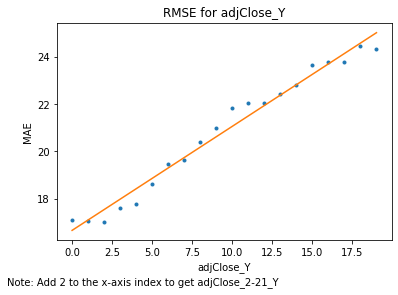

In [29]:
# Plot the MAE for adjClose
x = np.arange(20)
y = mae[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('MAE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [49]:
# Get last 20% of rows
tail = df.tail(188157)

# Reset index
tail.reset_index(drop=True, inplace=True)

# Merge predictions with original data frame
df = pd.concat([tail, pd.DataFrame(ypred)], axis=1, ignore_index=True)

# Rename columns
df.columns = ['post_id', 'date', 'num_comments', 'score', 'total_awards',
              'author_commentkarma', 'compound_score', 'author_id', 'author_name',
              'ticker', 'post_type', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
              'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
              'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
              'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
              'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
              'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
              'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
              'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
              'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
              'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
              'adjclose_21_Y', 'pred_adjClose_2_Y', 'pred_adjClose_3_Y',
              'pred_adjClose_4_Y', 'pred_adjClose_5_Y', 'pred_adjClose_6_Y',
              'pred_adjClose_7_Y', 'pred_adjClose_8_Y', 'pred_adjClose_9_Y',
              'pred_adjClose_10_Y', 'pred_adjClose_11_Y', 'pred_adjClose_12_Y',
              'pred_adjClose_13_Y', 'pred_adjClose_14_Y', 'pred_adjClose_15_Y',
              'pred_adjClose_16_Y', 'pred_adjClose_17_Y', 'pred_adjClose_18_Y',
              'pred_adjClose_19_Y', 'pred_adjClose_20_Y', 'pred_adjClose_21_Y',
              'pred_5day_min', 'pred_10day_min', 'pred_15day_min', 'pred_20day_min',
              'pred_5day_max', 'pred_10day_max', 'pred_15day_max', 'pred_20day_max']

df

,post_id,date,num_comments,score,total_awards,author_commentkarma,compound_score,author_id,author_name,ticker,...,pred_adjClose_20_Y,pred_adjClose_21_Y,pred_5day_min,pred_10day_min,pred_15day_min,pred_20day_min,pred_5day_max,pred_10day_max,pred_15day_max,pred_20day_max
0,g8nsyb3,2020-10-13,0,8,0.0,210444.0,0.6771,26vwq97v,BallsofSt33I,ADES,...,3.980982,4.169490,3.861315,6.648253,8.827734,10.477612,3.960343,6.545739,9.919244,13.493416
1,g8nuf6y,2020-10-13,1,10,0.0,5633.0,-0.0772,60ts8a16,Bonerhawk69,WSBC,...,21.093763,21.952346,3.979824,5.338555,5.761688,8.796324,5.214114,7.786786,9.243412,12.941699
2,g8p4wg6,2020-10-13,0,3,0.0,5229.0,0.2732,tmgux,phil6298,AEHR,...,1.486951,1.550748,4.218626,5.418544,8.128531,8.902510,3.519544,6.430136,8.916192,10.397566
3,g8p4wg6,2020-10-13,0,3,0.0,5229.0,0.2732,tmgux,phil6298,MYGN,...,12.389356,13.276225,4.057436,7.695265,9.711546,11.340408,3.442002,5.898273,7.998976,12.459273
4,g8o1jpy,2020-10-13,1,8,0.0,45202.0,-0.4019,4dz6ruyc,silverlink22,WSBC,...,20.858981,21.742802,3.975828,5.301500,5.750030,8.798676,5.228735,7.822870,9.245653,12.962953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188152,ghmym1x,2020-12-31,1,8,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,ADES,...,5.907256,6.430435,3.384451,7.441604,10.958678,12.933791,4.224778,5.851328,6.957463,8.392325
188153,ghmym1x,2020-12-31,1,8,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,JAN,...,4.632397,4.855218,3.707300,6.588900,7.769525,11.242231,3.940890,5.577415,8.301288,11.984416
188154,ghmynsf,2020-12-31,1,10,0.0,4431.0,0.4939,vh0ilgz,MerganzerMunson,FEYE,...,17.046317,17.714755,3.899786,5.123222,7.205415,8.530318,4.033034,6.602608,9.870439,14.667133
188155,ghmiiu6,2020-12-31,0,4,0.0,22288.0,-0.3875,bgruy,DeadSol,WSBC,...,26.342115,25.666454,3.494915,6.456907,7.987680,8.861572,4.596873,7.376766,8.755073,9.082172


In [52]:
df.to_csv("red_fin_preds.csv", index=False)